In [77]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras import datasets
#from tensorflow.keras.datasets import fashion_mnist


In [78]:
# MNIST 데이터셋에서 훈련 데이터와 레이블, 테스트 데이터와 레이블을 로드합니다.
(X_train, Y_train),(X_test, Y_test)= datasets.fashion_mnist.load_data()

# 훈련 데이터의 형태와 레이블의 형태를 출력합니다.
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [79]:
label = ['T-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']


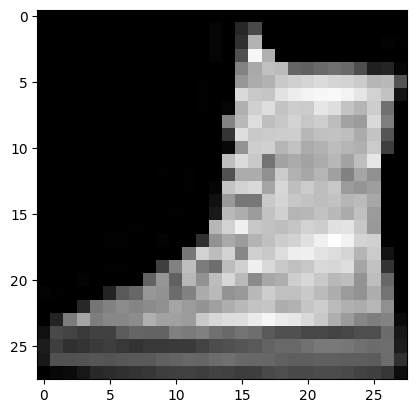

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   5   0  39  73   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   5   0  49 180   0
    0   0   0   0   0   0   0   0   3   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   5   0  80 247 176
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 131 169 192
  187 101  96 106 112 105  78  33  37   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0 151 172 178
  201 208 213 219 213 212 203 181 185  83]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0 217 201 197
  226 237 244 247 249 244 230 210 194  19]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   5 176 208 222
  196 205 203 230 222 196 181 205 112   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 131 

In [80]:
# 무작위로 선택한 샘플 이미지를 플로팅합니다.
my_sample =np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
# 선택한 샘플의 레이블과 픽셀 값들을 출력합니다
print(Y_train[my_sample])
print(X_train[my_sample])
# 0~255 : 255가 가장 큰 값


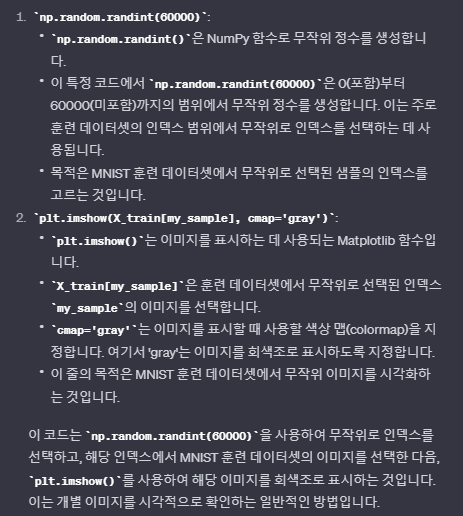

In [81]:
# to_categorical 함수를 사용하여 레이블을 원-핫 인코딩합니다.
y_train = to_categorical(Y_train)
y_test= to_categorical(Y_test)
# 인코딩된 레이블을 출력합니다.
print(Y_train[5000]) # 5000번 인덱스에 나온 값을 출력
print(y_train[5000])


4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [82]:
# 이미지 데이터를 1차원으로 변환합니다.
x_train = X_train.reshape(-1,28*28)
x_test = X_test.reshape(-1,28*28)
# 픽셀 값의 범위를 0~255에서 0~1로 조정합니다.
x_train = x_train / 255
x_test = x_test / 255
# 변환된 데이터의 형태를 출력합니다.
print(x_train.shape)


(60000, 784)


In [83]:
model = Sequential()
model.add(Dense(128,input_dim= 784,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) # 다중 클래스 구분을 위한 마지막 function은 softmax를 써야한다.
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


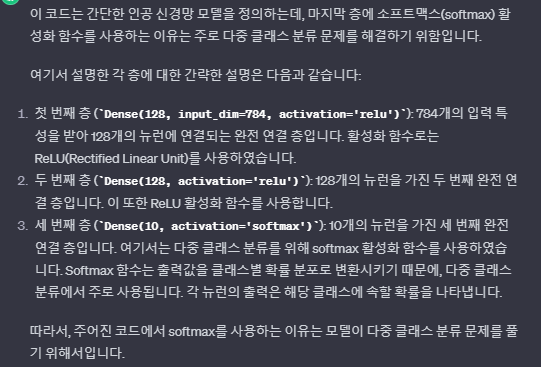

In [84]:
#opt=Adam(learning_rate=0.01)
#model.compile(opt, loss='categorial_crossentropy',metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=256,epochs=15,validation_split=0.2,verbose=1)

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])  # 'categorical_crossentropy'로 수정

fit_hist=model.fit(x_train, y_train, batch_size=256, epochs=15, validation_split=0.2, verbose=1)


Epoch 1/15
188/188 [==============================] - 4s 10ms/step - loss: 0.6023 - accuracy: 0.7888 - val_loss: 0.4574 - val_accuracy: 0.8348
Epoch 2/15
188/188 [==============================] - 2s 9ms/step - loss: 0.3970 - accuracy: 0.8556 - val_loss: 0.4194 - val_accuracy: 0.8501
Epoch 3/15
188/188 [==============================] - 2s 11ms/step - loss: 0.3657 - accuracy: 0.8674 - val_loss: 0.3890 - val_accuracy: 0.8553
Epoch 4/15
188/188 [==============================] - 3s 16ms/step - loss: 0.3365 - accuracy: 0.8763 - val_loss: 0.3676 - val_accuracy: 0.8682
Epoch 5/15
188/188 [==============================] - 2s 12ms/step - loss: 0.3265 - accuracy: 0.8785 - val_loss: 0.3780 - val_accuracy: 0.8632
Epoch 6/15
188/188 [==============================] - 2s 10ms/step - loss: 0.3160 - accuracy: 0.8833 - val_loss: 0.3608 - val_accuracy: 0.8717
Epoch 7/15
188/188 [==============================] - 2s 11ms/step - loss: 0.3092 - accuracy: 0.8852 - val_loss: 0.3672 - val_accuracy: 0.8693


In [85]:
score =model.evaluate(x_test,y_test,verbose=0)
print('accuracy',score[1])


accuracy 0.8640000224113464


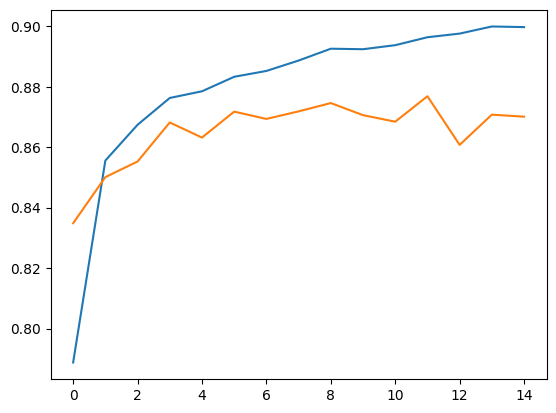

In [86]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()


dress
1/1 [==============================] - 0s 240ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
dress


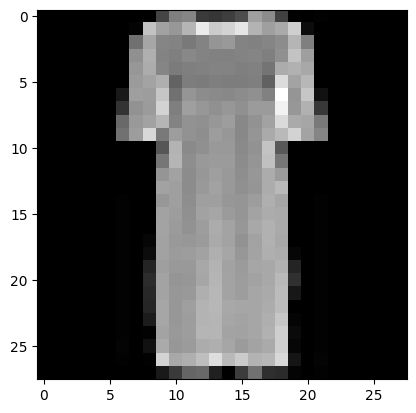

In [88]:
# # 랜덤한 샘플 선택
# my_sample = np.random.randint(10000)
# # 선택한 샘플 이미지 표시
# plt.imshow(X_test[my_sample], cmap='gray')
# # 선택한 샘플의 실제 레이블 출력
# print(label[Y_test[my_sample]])
# # 모델로 예측 수행
# pred = model.predict(X_test[my_sample].reshape(-1, 784))  # Reshape을 통해 모델에 입력할 수 있도록 변경
# print(pred)
# print(label[np.argmax(pred)])

my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')
print(label[Y_test[my_sample]])
pred = model.predict(X_test[my_sample].reshape(-1, 784))
print(pred)
print(label[np.argmax(pred)])
